In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn import metrics
import pickle
import plotly.graph_objs as go
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df_songs = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/course project/songs.csv')
df_artists = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/course project/artist.csv')

In [ ]:
df_artists

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.000000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.111111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27616,鳳飛飛,0.884000,0.358000,259387.000000,0.208000,0.000002,0.150000,-9.524000,0.033900,131.261000,0.278000,35.000000,10,1,2
27617,黃品源,0.541000,0.578000,293840.000000,0.334000,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,47.000000,9,0,2
27618,黃國隆,0.785455,0.570818,174582.727273,0.148400,0.000083,0.142191,-21.610091,0.054355,119.586273,0.741273,20.000000,5,1,11
27619,黃蜀娟,0.925143,0.322262,212989.857143,0.141490,0.000189,0.196757,-19.256714,0.055571,111.685381,0.267033,23.000000,10,1,42


In [ ]:
df_artists.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,27621.000000,27621.000000,2.762100e+04,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000
mean,0.504651,0.544411,2.374886e+05,0.493708,0.166661,0.203603,-11.222480,0.096180,115.439232,0.516032,34.288478,5.409942,0.767170,14.313493
std,0.369788,0.176098,1.209766e+05,0.253566,0.292133,0.140311,5.819377,0.116062,25.138470,0.243304,22.104194,3.485676,0.422643,53.867027
min,0.000000,0.000000,1.879550e+04,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.128784,0.429000,1.819730e+05,0.282000,0.000004,0.111667,-14.097000,0.039500,98.725500,0.334000,13.511111,2.000000,1.000000,2.000000
50%,0.493000,0.555667,2.176930e+05,0.501000,0.001610,0.162850,-10.135333,0.052644,114.950000,0.528500,39.000000,6.000000,1.000000,3.000000
75%,0.901000,0.673000,2.660000e+05,0.699000,0.188000,0.247371,-6.906000,0.098000,129.612647,0.705000,51.000000,8.000000,1.000000,9.000000
max,0.996000,0.986000,5.403500e+06,1.000000,1.000000,0.991000,1.342000,0.964000,217.743000,0.991000,95.000000,11.000000,1.000000,3172.000000


In [ ]:
df_songs

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [ ]:
df_songs.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


In [ ]:
def normalize_column(df_column: pd.Series) -> pd.Series:
    min_ = df_column.min()
    max_ = df_column.max()
    return (df_column - min_) / (max_ - min_)

Hana EDA part:

In [ ]:
sns.pairplot(df_songs.drop(['duration_ms','mode','key','explicit','release_date'], axis=1))

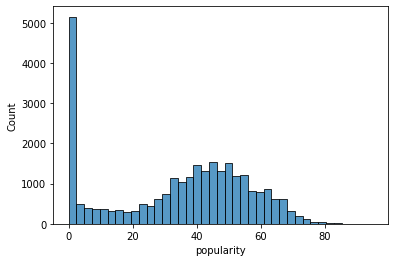

In [ ]:
sns.histplot(df_artists.popularity)

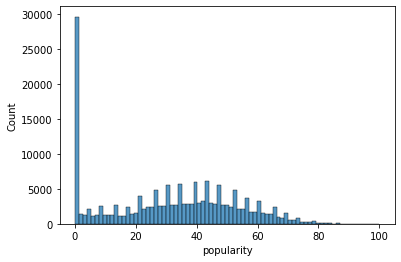

In [ ]:
sns.histplot(df_songs.popularity)

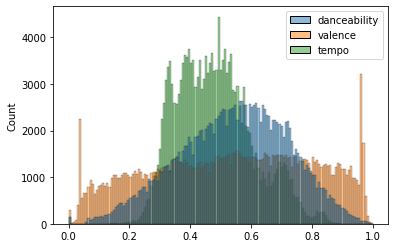

In [ ]:
sns.histplot([normalize_column(df_songs['danceability']), normalize_column(df_songs['valence']), normalize_column(df_songs['tempo'])])

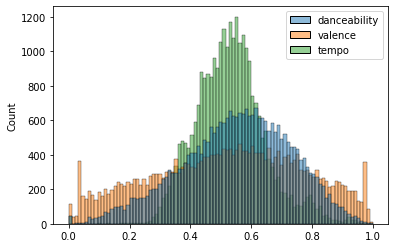

In [ ]:
sns.histplot([normalize_column(df_artists['danceability']), normalize_column(df_artists['valence']), normalize_column(df_artists['tempo'])])

In [ ]:
#for the clustering part we just focus on features that are related to characteristics of songs, so drop other columns
df = df_songs.drop(['artists','duration_ms','explicit','id','key','mode','name','popularity','release_date'], axis=1)
df['loudness'] = normalize_column(df['loudness'])
df['tempo'] = normalize_column(df['tempo'])
d= pd.DataFrame(df.groupby(by=['year']).mean())
d = d.reset_index()
import plotly.graph_objects as go
layout = go.Layout(
    title="This is a line chart representing the trend of characteristic features",
    xaxis=dict(
        title="Year"
    ),
    yaxis=dict(
        title=""
    ) ) 
dd = d.copy()
dd.drop('year',axis=1,inplace=True)
fig = go.Figure(layout=layout)
for c in dd.columns:

  fig.add_trace(
          go.Scatter(
              x=d.year,
              y=d[c],
              name=c
            
          ))


fig.show()

In [ ]:
d= pd.DataFrame(df_songs.groupby(by=['year']).mean()['popularity'])
d = d.reset_index()
layout = go.Layout(
    title="This is a line chart representing the trend of popularity",
    xaxis=dict(
        title="Year"
    ),
    yaxis=dict(
        title="Popularity"
    ) )
fig = go.Figure(layout=layout)

fig.add_trace(
          go.Scatter(
              x=d.year,
              y=d.popularity,
             
            
          ))


fig.show()

Clustering for songs

In [ ]:
#lets drop songs with popularity 0 so that we just cluster popular songs
df2 = df_songs[df_songs['popularity']>0]
df2.reset_index(inplace=True)

In [ ]:
#for the clustering part we just focus on features that are related to characteristics of songs, so drop other columns
df1 = df2.drop(['artists','duration_ms','explicit','id','key','mode','name','popularity','release_date','year'], axis=1)

In [ ]:
df1

,index,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,4,0.9900,0.210,0.2040,0.908000,0.0980,-16.829,0.0424,62.149,0.0693
1,11,0.9890,0.170,0.0823,0.911000,0.0962,-30.107,0.0317,85.989,0.3460
2,40,0.9770,0.305,0.0830,0.697000,0.2310,-20.895,0.0331,80.622,0.0479
3,42,0.9900,0.337,0.0699,0.903000,0.1060,-23.806,0.0322,72.133,0.1350
4,47,0.9850,0.355,0.0452,0.825000,0.1530,-24.125,0.0329,84.551,0.2760
...,...,...,...,...,...,...,...,...,...,...
142547,169904,0.1730,0.875,0.4430,0.000032,0.0891,-7.461,0.1430,100.012,0.3060
142548,169905,0.0167,0.719,0.3850,0.031300,0.1110,-10.907,0.0403,128.000,0.2700
142549,169906,0.5380,0.514,0.5390,0.002330,0.1080,-9.332,0.1050,123.700,0.1530
142550,169907,0.0714,0.646,0.7610,0.000000,0.2220,-2.557,0.0385,129.916,0.4720


In [ ]:
#lets normalize tempo and loudness too
from sklearn.preprocessing import MinMaxScaler

df1['loudness'] = normalize_column(df1['loudness'])
df1['tempo'] = normalize_column(df1['tempo'])

Hierarchical with different linkages

In [ ]:
hierarchy_model_ward = AgglomerativeClustering(n_clusters=11, affinity='euclidean', linkage='ward')  
ward_clusters = hierarchy_model_ward.fit_predict(df1.iloc[:10000,:])

In [ ]:
hierarchy_model_complete = AgglomerativeClustering(n_clusters=11, affinity='euclidean', linkage='complete')  
compelte_clusters = hierarchy_model_complete.fit_predict(df1.iloc[:10000,:])

In [ ]:
hierarchy_model_average = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='average')  
average_clusters = hierarchy_model_average.fit_predict(df1.iloc[:10000,:])

In [ ]:
hierarchy_model_single = AgglomerativeClustering(n_clusters=11, affinity='euclidean', linkage='single')  
single_clusters = hierarchy_model_single.fit_predict(df1.iloc[:10000,:])

PCA for visualizing in 2 dimension


In [ ]:
#sample for hana to check the visualization
pca1 = PCA(n_components=2)
principalComponents1 = pca1.fit_transform(df1.iloc[:10000,:])
principalDf1 = pd.DataFrame(data = principalComponents1
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
#this is the pca for all the data 
pca = PCA(n_components=2, svd_solver='full')
principalComponents = pca.fit_transform(df1)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

T-SNE for visualizing in 2 dimension

In [ ]:
tsne = TSNE(n_components=2)
tsneComponents = tsne.fit_transform(df1)
tsneDf = pd.DataFrame(data = tsneComponents
             , columns = ['tsne 1', 'tsne 2'])

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=kmeans_clusters) 


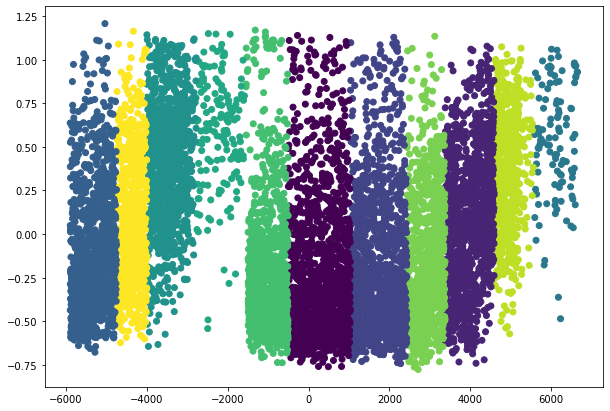

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(principalDf1['principal component 1'], principalDf1['principal component 2'], c=compelte_clusters) 


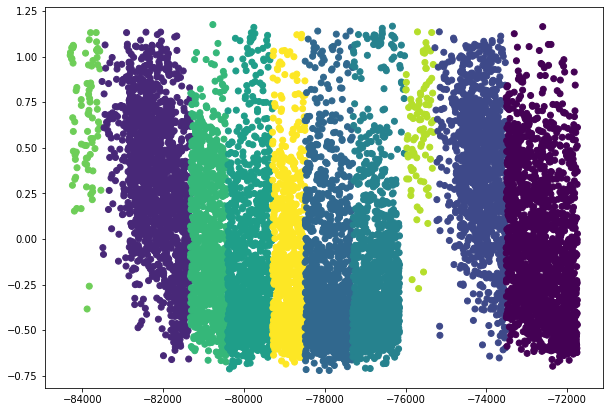

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(principalDf.iloc[:10000,0], principalDf.iloc[:10000,1], c=average_clusters) 


In [ ]:
principalDf

,principal component 1,principal component 2
0,-84298.348659,1.007158
1,-84291.348659,1.022870
2,-84262.348659,0.987862
3,-84260.348659,1.048850
4,-84255.348659,0.989092
...,...,...
142547,85601.651341,-0.143293
142548,85602.651341,-0.181547
142549,85603.651341,0.170261
142550,85604.651341,-0.409175


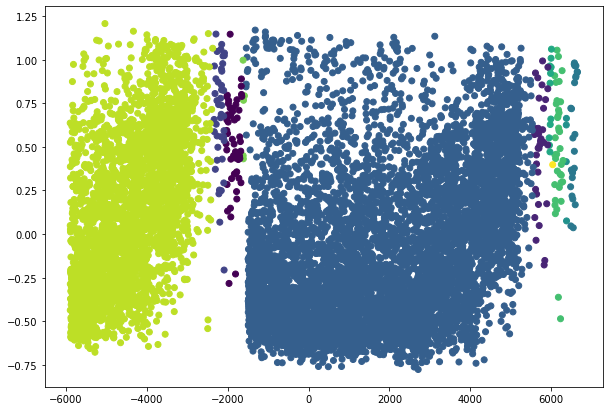

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(principalDf1['principal component 1'], principalDf1['principal component 2'], c=single_clusters) 


Kmeans 

In [ ]:
kmeans_model = KMeans(init='random', n_clusters=11)
kmeans_clusters = kmeans_model.fit_predict(df1)
#score = metrics.silhouette_score(df1, kmeans_model.labels_)

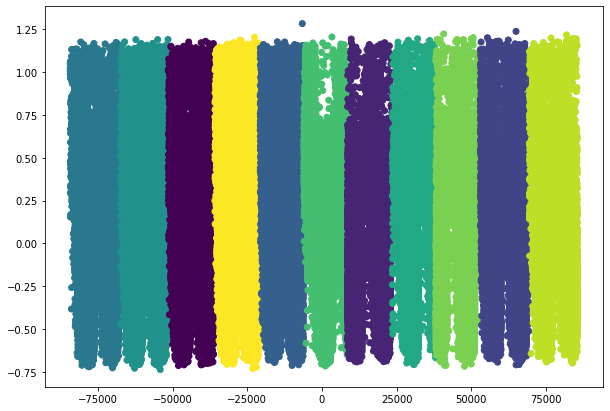

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=kmeans_clusters) 


Text(0, 0.5, 'tSNE 2')

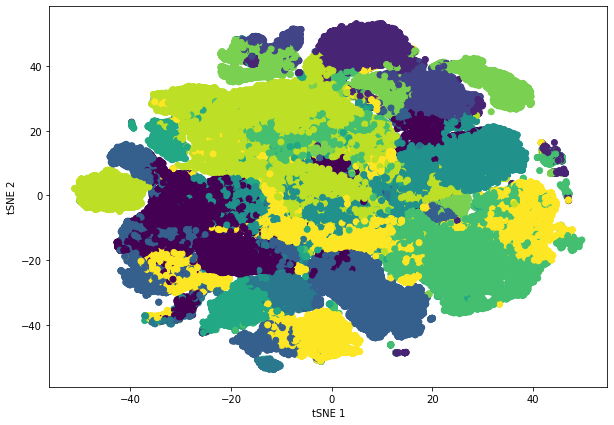

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(d.tsne1, d.tsne2,c=d.kmeans) 
plt.xlabel('tSNE 1')
plt.ylabel('tSNE 2')

In [ ]:
#preparing a dataset with all the needed columns for clustering
df_clustering_hana= df1.copy()
df_clustering_hana=df_clustering_hana.reset_index()
df_clustering_hana['kmeans']=kmeans_clusters
df_clustering_hana['ward']=np.append(ward_clusters,[-1]*(142552 -10000))
df_clustering_hana['complete']=np.append(compelte_clusters,[-1]*(142552 -10000))
df_clustering_hana['average']=np.append(average_clusters,[-1]*(142552 -10000))
df_clustering_hana['single']=np.append(single_clusters,[-1]*(142552 -10000))
df_clustering_hana.drop('index',axis=1,inplace=True)
df_clustering_hana['id']=df2['id']
df_clustering_hana['pca1'] = principalDf['principal component 1']
df_clustering_hana['pca2'] = principalDf['principal component 2']
df_clustering_hana['tsne1'] = tsneDf['tsne 1']
df_clustering_hana['tsne2'] = tsneDf['tsne 2']
df_clustering_hana['name'] = df2['name']
df_clustering_hana

,level_0,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,kmeans,ward,complete,average,single,id,pca1,pca2,name
0,0,0.9900,0.210,0.2040,0.908000,0.0980,0.677256,0.0424,0.254614,0.0693,4,1,4,7,4,6N6tiFZ9vLTSOIxkj8qKrd,-84298.348659,1.007158,"Polonaise-Fantaisie in A-Flat Major, Op. 61"
1,1,0.9890,0.170,0.0823,0.911000,0.0962,0.468954,0.0317,0.352283,0.3460,4,1,4,7,4,6QIONtzbQCbnmWNwn0H1yT,-84291.348659,1.022870,"Piano Sonata No. 2, Op. 35: IV. Finale. Presto"
2,2,0.9770,0.305,0.0830,0.697000,0.2310,0.613470,0.0331,0.330295,0.0479,4,1,4,7,4,6duqhjENDYbR2Q4Hpogh9M,-84262.348659,0.987862,"Nocturne in F-Sharp Major, Op. 15, No. 2"
3,3,0.9900,0.337,0.0699,0.903000,0.1060,0.567802,0.0322,0.295517,0.1350,4,1,4,7,4,6hUMURfCaJ6JB8EWL1ZLr7,-84260.348659,1.048850,"Nocturne F Minor, Op. 55, No. 1"
4,4,0.9850,0.355,0.0452,0.825000,0.1530,0.562798,0.0329,0.346391,0.2760,4,1,4,7,4,6j8nMxm9yFxN3Mdodm9tEl,-84255.348659,0.989092,"Mazurka in F Minor, Op. 7, No. 3"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142547,142547,0.1730,0.875,0.4430,0.000032,0.0891,0.824219,0.1430,0.409732,0.3060,9,-1,-1,-1,-1,4KppkflX7I3vJQk7urOJaS,85601.651341,-0.143293,Skechers (feat. Tyga) - Remix
142548,142548,0.0167,0.719,0.3850,0.031300,0.1110,0.770159,0.0403,0.524395,0.2700,9,-1,-1,-1,-1,1ehhGlTvjtHo2e4xJFB0SZ,85602.651341,-0.181547,Sweeter (feat. Terrace Martin)
142549,142549,0.5380,0.514,0.5390,0.002330,0.1080,0.794867,0.1050,0.506778,0.1530,9,-1,-1,-1,-1,52eycxprLhK3lPcRLbQiVk,85603.651341,0.170261,How Would I Know
142550,142550,0.0714,0.646,0.7610,0.000000,0.2220,0.901151,0.0385,0.532244,0.4720,9,-1,-1,-1,-1,3wYOGJYD31sLRmBgCvWxa4,85604.651341,-0.409175,I Found You


In [ ]:
df_clustering_hana.to_csv('clustering_hana.csv',index=False)

In [ ]:
d = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/course project/clustering_and_genre.csv')

In [ ]:
d

,Unnamed: 0,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,rf_label,svm_label,knn_label,kmeans,ward,single,average,complete,pca1,pca2,tsne1,tsne2
0,0,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,classical,classical,classical,8,9,0,0,0,1.024585,0.546189,33.225710,28.768063
1,1,0.9890,"['Frédéric Chopin', 'Vladimir Horowitz']",0.170,85133,0.0823,0,6QIONtzbQCbnmWNwn0H1yT,0.911000,10,0.0962,-30.107,0,"Piano Sonata No. 2, Op. 35: IV. Finale. Presto",1,1928,0.0317,85.989,0.3460,1928,classical,classical,classical,8,9,0,0,0,1.040260,0.380986,29.691717,41.710354
2,2,0.9770,"['Frédéric Chopin', 'Vladimir Horowitz']",0.305,215267,0.0830,0,6duqhjENDYbR2Q4Hpogh9M,0.697000,6,0.2310,-20.895,1,"Nocturne in F-Sharp Major, Op. 15, No. 2",1,1928,0.0331,80.622,0.0479,1928,classical,classical,classical,8,9,0,0,0,1.005221,0.400223,26.245148,-2.528315
3,3,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.337,333907,0.0699,0,6hUMURfCaJ6JB8EWL1ZLr7,0.903000,5,0.1060,-23.806,0,"Nocturne F Minor, Op. 55, No. 1",2,1928,0.0322,72.133,0.1350,1928,classical,classical,classical,8,9,0,0,0,1.066209,0.445275,32.760010,34.758990
4,4,0.9850,"['Frédéric Chopin', 'Vladimir Horowitz']",0.355,138013,0.0452,0,6j8nMxm9yFxN3Mdodm9tEl,0.825000,1,0.1530,-24.125,1,"Mazurka in F Minor, Op. 7, No. 3",2,1928,0.0329,84.551,0.2760,1928,classical,classical,classical,8,9,0,0,0,1.006414,0.311425,29.033144,40.063270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142547,142547,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020,pop,pop,pop,10,-1,-1,-1,-1,-0.160869,0.039555,40.275524,-1.326706
142548,142548,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020,pop,pop,pop,10,-1,-1,-1,-1,-0.199051,0.189858,39.562122,-6.098898
142549,142549,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020,classical,pop,pop,10,-1,-1,-1,-1,0.152793,0.109856,-31.554756,-28.559607
142550,142550,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020,pop,pop,pop,7,-1,-1,-1,-1,-0.426606,0.115415,-11.995120,16.776615


Regression on Artists

In [ ]:
df_artists

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.000000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.111111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27616,鳳飛飛,0.884000,0.358000,259387.000000,0.208000,0.000002,0.150000,-9.524000,0.033900,131.261000,0.278000,35.000000,10,1,2
27617,黃品源,0.541000,0.578000,293840.000000,0.334000,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,47.000000,9,0,2
27618,黃國隆,0.785455,0.570818,174582.727273,0.148400,0.000083,0.142191,-21.610091,0.054355,119.586273,0.741273,20.000000,5,1,11
27619,黃蜀娟,0.925143,0.322262,212989.857143,0.141490,0.000189,0.196757,-19.256714,0.055571,111.685381,0.267033,23.000000,10,1,42


In [ ]:
df_artists.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,27621.000000,27621.000000,2.762100e+04,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000
mean,0.504651,0.544411,2.374886e+05,0.493708,0.166661,0.203603,-11.222480,0.096180,115.439232,0.516032,34.288478,5.409942,0.767170,14.313493
std,0.369788,0.176098,1.209766e+05,0.253566,0.292133,0.140311,5.819377,0.116062,25.138470,0.243304,22.104194,3.485676,0.422643,53.867027
min,0.000000,0.000000,1.879550e+04,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.128784,0.429000,1.819730e+05,0.282000,0.000004,0.111667,-14.097000,0.039500,98.725500,0.334000,13.511111,2.000000,1.000000,2.000000
50%,0.493000,0.555667,2.176930e+05,0.501000,0.001610,0.162850,-10.135333,0.052644,114.950000,0.528500,39.000000,6.000000,1.000000,3.000000
75%,0.901000,0.673000,2.660000e+05,0.699000,0.188000,0.247371,-6.906000,0.098000,129.612647,0.705000,51.000000,8.000000,1.000000,9.000000
max,0.996000,0.986000,5.403500e+06,1.000000,1.000000,0.991000,1.342000,0.964000,217.743000,0.991000,95.000000,11.000000,1.000000,3172.000000


In [ ]:
# preprocessing on artists and normalize some of the columns
temp = df_artists.copy()
clmn = ['duration_ms','loudness', 'tempo', 'key', 'count']
for c in clmn:
  temp[c] = normalize_column(temp[c])
temp=temp.drop(['artists','mode'], axis=1) 

In [ ]:
temp.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,count
count,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000
mean,0.504651,0.544411,0.040614,0.493708,0.166661,0.203603,0.795173,0.096180,0.530163,0.516032,34.288478,0.491813,0.004199
std,0.369788,0.176098,0.022467,0.253566,0.292133,0.140311,0.094868,0.116062,0.115450,0.243304,22.104194,0.316880,0.016987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.128784,0.429000,0.030304,0.282000,0.000004,0.111667,0.748313,0.039500,0.453404,0.334000,13.511111,0.181818,0.000315
50%,0.493000,0.555667,0.036937,0.501000,0.001610,0.162850,0.812896,0.052644,0.527916,0.528500,39.000000,0.545455,0.000631
75%,0.901000,0.673000,0.045909,0.699000,0.188000,0.247371,0.865541,0.098000,0.595255,0.705000,51.000000,0.727273,0.002523
max,0.996000,0.986000,1.000000,1.000000,1.000000,0.991000,1.000000,0.964000,1.000000,0.991000,95.000000,1.000000,1.000000


In [ ]:
temp

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,count
0,0.575083,0.442750,0.042428,0.386336,0.022717,0.287708,0.746545,0.180675,0.532662,0.334433,38.000000,0.454545,0.003469
1,0.862538,0.441731,0.049861,0.406808,0.081158,0.315215,0.803854,0.176212,0.473238,0.268865,33.076923,0.454545,0.007884
2,0.856571,0.348286,0.057594,0.286571,0.024593,0.325786,0.729831,0.118514,0.355354,0.354857,34.285714,0.000000,0.001892
3,0.884926,0.425074,0.045331,0.245770,0.073587,0.275481,0.723169,0.123200,0.407212,0.372030,34.444444,0.000000,0.008199
4,0.605444,0.437333,0.039674,0.429333,0.037534,0.216111,0.791510,0.086000,0.552622,0.458667,42.555556,1.000000,0.002523
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27616,0.884000,0.358000,0.044681,0.208000,0.000002,0.150000,0.822862,0.033900,0.602825,0.278000,35.000000,0.909091,0.000315
27617,0.541000,0.578000,0.051079,0.334000,0.000006,0.067500,0.782922,0.026700,0.624286,0.243000,47.000000,0.818182,0.000315
27618,0.785455,0.570818,0.028931,0.148400,0.000083,0.142191,0.625834,0.054355,0.549208,0.741273,20.000000,0.454545,0.003154
27619,0.925143,0.322262,0.036064,0.141490,0.000189,0.196757,0.664199,0.055571,0.512923,0.267033,23.000000,0.909091,0.012930


In [ ]:
x = temp.drop('popularity',axis=1)
y = temp['popularity']

In [ ]:
x.to_csv('artist_dataset_x.csv',index=False)

In [ ]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)


Linear Regression on artists:

In [ ]:
LinearRegression_artists = LinearRegression()
LinearRegression_artists.fit(X_train, y_train) 
y_p = LinearRegression_artists.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_p))
print("R2:", r2_score(y_test, y_p))
LinearRegression_artists.score(X_test, y_test)

MSE: 263.3924929197392
R2: 0.4544561920144762


0.4544561920144762

In [ ]:
filename = 'LinearRegression_artists.sav'
pickle.dump(LinearRegression_artists, open(filename, 'wb'))

In [ ]:
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, y_test)
# result

0.4544561920144762

SVM on Artists:



In [ ]:
#gridsearch for choosing the parameter for SVM
param_grid = {'C': [ 10, 100, 1000], 'gamma': [1,0.1,0.01], 'kernel': ['rbf']} 
SVM_artists = GridSearchCV(SVR(),param_grid,refit=True,verbose=3,cv=2)
SVM_artists.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV 1/2] END .........C=10, gamma=1, kernel=rbf;, score=0.611 total time=  17.3s
[CV 2/2] END .........C=10, gamma=1, kernel=rbf;, score=0.613 total time=  17.1s
[CV 1/2] END .......C=10, gamma=0.1, kernel=rbf;, score=0.549 total time=  16.7s
[CV 2/2] END .......C=10, gamma=0.1, kernel=rbf;, score=0.546 total time=  16.6s
[CV 1/2] END ......C=10, gamma=0.01, kernel=rbf;, score=0.434 total time=  16.3s
[CV 2/2] END ......C=10, gamma=0.01, kernel=rbf;, score=0.431 total time=  16.2s
[CV 1/2] END ........C=100, gamma=1, kernel=rbf;, score=0.629 total time=  19.0s
[CV 2/2] END ........C=100, gamma=1, kernel=rbf;, score=0.628 total time=  18.9s
[CV 1/2] END ......C=100, gamma=0.1, kernel=rbf;, score=0.588 total time=  16.5s
[CV 2/2] END ......C=100, gamma=0.1, kernel=rbf;, score=0.588 total time=  16.5s
[CV 1/2] END .....C=100, gamma=0.01, kernel=rbf;, score=0.471 total time=  16.2s
[CV 2/2] END .....C=100, gamma=0.01, kernel=rbf;,

GridSearchCV(cv=2, estimator=SVR(),
             param_grid={'C': [10, 100, 1000], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
SVM_artists.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
y_pred = SVM_artists.predict(X_test)
print('MSE', mean_squared_error(y_test, y_pred))
print('MAE' , mean_absolute_error(y_test, y_pred) )
print('Score',SVM_artists.score(X_test, y_test))

MSE 183.20847327890485
MAE 9.610771945412125
Score 0.6205349398540223


In [ ]:
filename = 'SVM_artists.sav'
pickle.dump(SVM_artists, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open('SVM_artists.sav', 'rb'))
loaded_model.predict([X_test.iloc[0]]) #the input should be a 2D array

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  "X does not have valid feature names, but"


array([34.72297575])

Random Forst on artists:

In [ ]:
#gridsearch for choosing the best parameter for RF
est= RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [50,100],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True],
            }

RF_artists= GridSearchCV(est, param_grid,refit=True,verbose=3, cv=2)
RF_artists.fit(X_train, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV 1/2] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=50;, score=0.677 total time=   5.7s
[CV 2/2] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=50;, score=0.673 total time=   5.6s
[CV 1/2] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=100;, score=0.680 total time=  11.2s
[CV 2/2] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=100;, score=0.679 total time=  11.1s
[CV 1/2] END bootstrap=True, max_features=auto, min_samples_split=4, n_estimators=50;, score=0.678 total time=   5.4s
[CV 2/2] END bootstrap=True, max_features=auto, min_samples_split=4, n_estimators=50;, score=0.672 total time=   5.3s
[CV 1/2] END bootstrap=True, max_features=auto, min_samples_split=4, n_estimators=100;, score=0.680 total time=  10.7s
[CV 2/2] END bootstrap=True, max_features=auto, min_samples_split=4, n_estimators=100;, score=0.678 total time

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [50, 100]},
             verbose=3)

In [ ]:
RF_artists.best_params_

{'bootstrap': True,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
y_pred = RF_artists.predict(X_test)
print('MSE', mean_squared_error(y_test, y_pred))
print('MAE' , mean_absolute_error(y_test, y_pred) )
print('Score',RF_artists.score(X_test, y_test))

MSE 139.1990982467058
MAE 8.474359606393891
Score 0.7116880390786268


In [ ]:
filename = 'RF_artists.sav'
pickle.dump(RF_artists, open(filename, 'wb'))

In [ ]:
#comraing the performance of regression models on artists
langs = ['Linear Regression', 'Support Vector Machine', 'Random Forest']
students = [0.4544561920144762*100,0.6205349398540223*100,0.7116880390786268*100]
c = ['palegreen','pink','violet']
data = [go.Bar(
   x = langs,
   y = students,
    marker_color = c
)]
layout = go.Layout(
    title="Artists' popularity prediction",
    xaxis=dict(
        title="Model"
    ),
    yaxis=dict(
        title="Score"
    ) ) 
fig = go.Figure(data=data,layout=layout)
fig

Regression on Songs

In [ ]:
df_songs

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.9950,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563000,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.9940,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901000,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.6040,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.9950,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887000,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.9900,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908000,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,"['DripReport', 'Tyga']",0.875,163800,0.4430,1,4KppkflX7I3vJQk7urOJaS,0.000032,1,0.0891,-7.461,1,Skechers (feat. Tyga) - Remix,75,2020-05-15,0.1430,100.012,0.3060,2020
169905,0.0167,"['Leon Bridges', 'Terrace Martin']",0.719,167468,0.3850,0,1ehhGlTvjtHo2e4xJFB0SZ,0.031300,8,0.1110,-10.907,1,Sweeter (feat. Terrace Martin),64,2020-06-08,0.0403,128.000,0.2700,2020
169906,0.5380,"['Kygo', 'Oh Wonder']",0.514,180700,0.5390,0,52eycxprLhK3lPcRLbQiVk,0.002330,7,0.1080,-9.332,1,How Would I Know,70,2020-05-29,0.1050,123.700,0.1530,2020
169907,0.0714,"['Cash Cash', 'Andy Grammer']",0.646,167308,0.7610,0,3wYOGJYD31sLRmBgCvWxa4,0.000000,1,0.2220,-2.557,1,I Found You,70,2020-02-28,0.0385,129.916,0.4720,2020


In [ ]:

df1 = df_songs.copy()

In [ ]:
# preprocessing on songs and normalizing some columns
df1 = df1.drop(['artists','explicit','id','mode','name','release_date','year'], axis=1)
df1['loudness'] = normalize_column(df1['loudness'])
df1['tempo'] = normalize_column(df1['tempo'])
df1['duration_ms'] = normalize_column(df1['duration_ms'])
df1['key'] = normalize_column(df1['key'])

In [ ]:
df1.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,popularity,speechiness,tempo,valence
count,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,0.041920,0.488593,0.161937,0.472774,0.206690,0.761565,31.556610,0.094058,0.479116,0.532095
std,0.376627,0.175346,0.022474,0.267390,0.309329,0.319569,0.176796,0.088744,21.582614,0.149937,0.125883,0.262408
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.094500,0.417000,0.030737,0.263000,0.000000,0.181818,0.098400,0.713022,12.000000,0.034900,0.383119,0.322000
50%,0.492000,0.548000,0.037695,0.481000,0.000204,0.454545,0.135000,0.775601,33.000000,0.045000,0.470226,0.544000
75%,0.888000,0.667000,0.047765,0.710000,0.086800,0.727273,0.263000,0.828158,48.000000,0.075400,0.555989,0.749000
max,0.996000,0.988000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,0.969000,1.000000,1.000000


In [ ]:
X = df1.drop('popularity', axis=1)
y=df1['popularity']

In [ ]:
X.to_csv('songs_dataset_x.csv',index=False)

In [ ]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence
31517,0.00108,0.209,0.024593,0.780,0.025300,0.090909,0.2120,0.888811,0.0512,0.421470,0.626
708,0.86800,0.397,0.031533,0.775,0.000500,0.000000,0.6010,0.891582,0.1330,0.338235,0.875
110555,0.40100,0.679,0.026529,0.471,0.000018,0.363636,0.5520,0.741633,0.0577,0.462721,0.674
4104,0.15900,0.709,0.034781,0.654,0.000015,0.000000,0.1010,0.847169,0.0272,0.446424,0.829
148835,0.04110,0.565,0.044084,0.628,0.000000,0.636364,0.0763,0.775131,0.0416,0.521912,0.896
...,...,...,...,...,...,...,...,...,...,...,...
119879,0.86200,0.352,0.047493,0.054,0.000960,0.090909,0.1060,0.645040,0.0396,0.253950,0.185
103694,0.38000,0.693,0.069210,0.758,0.008400,0.454545,0.1300,0.786830,0.0369,0.398823,0.791
131932,0.19000,0.734,0.052156,0.784,0.000004,0.636364,0.6210,0.848172,0.0527,0.504263,0.963
146867,0.62400,0.489,0.027215,0.222,0.000000,0.727273,0.0931,0.753019,0.0400,0.623124,0.595


Linear Regression on songs:

In [ ]:
LinearRegression_songs = LinearRegression()
LinearRegression_songs.fit(X_train, y_train) 
y_p = LinearRegression_songs.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_p))
print("R2:", r2_score(y_test, y_p))
print('Score:',LinearRegression_songs.score(X_test, y_test))

MSE: 252.72671968775853
R2: 0.4587446696648467
Score: 0.4587446696648467


In [ ]:
filename = 'LinearRegression_songs.sav'
pickle.dump(LinearRegression_songs, open(filename, 'wb'))

Random Forest on songs:

In [ ]:
#gridsearcg for choosing the best parameter for RF on songs
est = RandomForestRegressor()
param_grid = { 
            "n_estimators"      : [50,100],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True],
            }

RF_songs = GridSearchCV(est, param_grid,refit=True,verbose=3, cv=2)
RF_songs.fit(X_train, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV 1/2] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=50;, score=0.597 total time=  39.2s
[CV 2/2] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=50;, score=0.593 total time=  39.2s
[CV 1/2] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=100;, score=0.602 total time= 1.3min
[CV 2/2] END bootstrap=True, max_features=auto, min_samples_split=2, n_estimators=100;, score=0.598 total time= 1.3min
[CV 1/2] END bootstrap=True, max_features=auto, min_samples_split=4, n_estimators=50;, score=0.598 total time=  37.8s
[CV 2/2] END bootstrap=True, max_features=auto, min_samples_split=4, n_estimators=50;, score=0.594 total time=  37.8s
[CV 1/2] END bootstrap=True, max_features=auto, min_samples_split=4, n_estimators=100;, score=0.603 total time= 1.3min
[CV 2/2] END bootstrap=True, max_features=auto, min_samples_split=4, n_estimators=100;, score=0.598 total time

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [50, 100]},
             verbose=3)

In [ ]:
RF_songs.best_params_

{'bootstrap': True,
 'max_features': 'log2',
 'min_samples_split': 4,
 'n_estimators': 100}

In [ ]:
y_pred = RF_songs.predict(X_test)
print('MSE', mean_squared_error(y_test, y_pred))
print('MAE' , mean_absolute_error(y_test, y_pred) )
print('Score',RF_songs.score(X_test, y_test))

MSE 177.9269077482888
MAE 10.158943005880456
Score 0.6189406195443247


In [ ]:
filename = 'RF_songs.sav'
pickle.dump(RF_songs, open(filename, 'wb'))

SVM on songs

In [ ]:
#gridsearch for choosing the parameter for SVM
param_grid = {'C': [ 100], 'gamma': [1,0.1], 'kernel': ['rbf']} 
SVM_songs = GridSearchCV(SVR(),param_grid,refit=True,verbose=3,cv=2)
SVM_songs.fit(X_train,y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV 1/2] END ........C=100, gamma=1, kernel=rbf;, score=0.569 total time=21.7min
[CV 2/2] END ........C=100, gamma=1, kernel=rbf;, score=0.564 total time=22.2min
[CV 1/2] END ......C=100, gamma=0.1, kernel=rbf;, score=0.535 total time=10.9min
[CV 2/2] END ......C=100, gamma=0.1, kernel=rbf;, score=0.530 total time=10.9min


GridSearchCV(cv=2, estimator=SVR(),
             param_grid={'C': [100], 'gamma': [1, 0.1], 'kernel': ['rbf']},
             verbose=3)

In [ ]:
SVM_songs.best_params_

In [ ]:
y_pred = SVM_songs.predict(X_test)
print('MSE', mean_squared_error(y_test, y_pred))
print('MAE' , mean_absolute_error(y_test, y_pred) )
print('Score',sVM_songs.score(X_test, y_test))

In [ ]:
filename = 'SVM_songs.sav'
pickle.dump(SVM_songs, open(filename, 'wb'))

In [ ]:
#comparing the result of regression models on songs
models = ['Linear Regression', 'Support Vector Machine', 'Random Forest']
scores = [0.4587446696648467*100,0.5645216170493019*100,0.6189406195443247*100]
c = ['palegreen','pink','violet']
data = [go.Bar(
   x = models,
   y = scores,
    marker_color = c
)]
layout = go.Layout(
    title="Songs' popularity prediction",
    xaxis=dict(
        title="Model"
    ),
    yaxis=dict(
        title="Score"
    ) ) 
fig = go.Figure(data=data,layout=layout)
fig

In [ ]:
#comraing the performance of regression models on artists
models = ['KNN', 'Support Vector Machine', 'Random Forest']
scores = [0.4939759036144578*100,0.4859437751004016*100,0.5020080321285141*100]
c = ['palegreen','pink','violet']
data = [go.Bar(
   x = models,
   y = scores,
    marker_color = c
)]
layout = go.Layout(
    title="Genre Classification",
    xaxis=dict(
        title="Model"
    ),
    yaxis=dict(
        title="Score"
    ) ) 
fig = go.Figure(data=data,layout=layout)
fig